# Анализ списка гипотез. Анализ А/В-теста и его результатов.

## Введение

Данный проект направлен на проведение анализа списка гипотез, подготовленного отделом маркетинга с целью увеличения выручки интернет-магазина, а также анализа проведенного А/В-теста и его результатов. Цель проекта - определение наиболее приоритетных гипотез; определение значимости А/В-теста и возможности его продолжения.

Проведения данного исследования будет базироваться на массивах данных, содержащих информацию о: 
1. перечне выдвинутых гипотез,
2. заказах, совершенных пользователями в рамках А/В-теста с указанием группы, в которую попал заказ,
3. пользователях интеренет-магазина с указанием их группы.

В ходе проведения данного исследования планируется:

1. Проведение приоритизации гипотез двумя методами;
2. Проведение анализа А/В-теста путем расчета ряда характеристик, по итогам чего будет принято решение о его результативности.

По итогам выполнения каждого пункта проекта будут сделаны промежуточные выводы. В заключении проекта будет сформирован вывод по резальтатам проведенного анализа с указанием имеющихся предположений.

## Приоритизация гипотез

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
pd.set_option('display.max_colwidth', None)

Рассмотрим первый датасет с перечнем выдвинутых гипотез и переименуем столбцы с использованием только строчных букв.

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
hypothesis.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

In [4]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Проведем приоритизацию гипотез методом ICE, отсортируем полученные данные в порядке убывания приоритета.

In [5]:
hypothesis['ICE'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 2)

hypothesis_ice = hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).reset_index(drop=True)

hypothesis_ice

,hypothesis,ICE
0,"Запустить акцию, дающую скидку на товар в день рождения",16.20
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
4,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
5,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
7,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Пять наиболее приоритетные гипотезы в соответствии с данным методом:

In [6]:
for i in range(5):
    print((i+1), hypothesis_ice.loc[i, 'hypothesis'])

1 Запустить акцию, дающую скидку на товар в день рождения
2 Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
3 Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
4 Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
5 Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа


Проведем приоритизацию гипотез методом RICE, отсортируем полученные данные в порядке убывания приоритета.

In [7]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

hypothesis_rice = hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False).reset_index(drop=True)

hypothesis_rice

,hypothesis,RICE
0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
1,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
2,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
4,"Запустить акцию, дающую скидку на товар в день рождения",16.2
5,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
6,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
7,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Пять наиболее приоритетных гипотез в соответствии с данным методом:

In [8]:
for i in range(5):
    print((i+1), hypothesis_rice.loc[i, 'hypothesis'])

1 Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2 Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3 Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
4 Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
5 Запустить акцию, дающую скидку на товар в день рождения


In [9]:
hypothesis[['hypothesis', 'ICE', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00,3.0


**Вывод по разделу**
Как видно из полученных результатов, приоритезация гипотез разными методами привела к отличающимся друг от друга результатами. Несмотря на то, что в ТОП-5 попали одни и те же гипотезы, порядок их приоритетов отличается. Это связано с тем, что примененный метод RICE учитывает оцененный в датафрейме параметр reach, в то время как в формуле ICE данный показатель не учитывается. 

Параметр reach оценивает уровень охвата пользователей. Поскольку данный параметр находится в числителе формулы RICE для расчета приоритета, он влияет на результат прямопропорционально, и следовательно, чем больше пользователей охватывает применение данной гипотезы, тем больше данный показатель будет влиять на ее приоритетность.

Например, гипотеза 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок' охватывает наибольшее количество пользователей, в связи с чем ее параметр reach = 10. Это и являлось причиной подъема данной гипотезы в приоритете до первого методом RICE с третьего методом ICE. Так же необходимо отметить, что данная гипотеза имеет высокие значения и по другим параметрам.

В условиях данного проекта, учитывая, что охват может быть оценен, более подходящим и точным является выбор метода RICE.

## Анализ А/В-теста.

Рассмотрим датасет с перечнем заказов, совершенных пользователями в рамках А/В-теста.

In [10]:
orders = pd.read_csv('/datasets/orders.csv')

orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Как видно из полученной информации о данном массиве данных, столбец `date` имеет неверный тип данных. Приобразуем его в необходимый тип datetime

In [12]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Проверим данный массив данных на наличие явных дубликатов.

In [13]:
orders.duplicated().sum()

0

Дубликаты не выявлены.

Рассмотрим датасет с перечнем пользователей в рамках А/В-теста.

In [14]:
visitors = pd.read_csv('/datasets/visitors.csv')

visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Как видно из полученной информации о данном массиве данных, столбец `date` имеет неверный тип данных. Приобразуем его в необходимый тип datetime

In [16]:
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Проверим данный массив данных на наличие явных дубликатов.

In [17]:
visitors.duplicated().sum()

0

Дубликаты не выявлены.

Проверим наличие задвоений посетителей между группами.

In [18]:
ordersA = orders.query('group == "A"')
ordersB = orders.query('group == "B"')

duplicated = ordersA.merge(ordersB, on = 'visitorId', how = 'inner', suffixes=['A', 'B'])

duplicated['visitorId'].count()

183

Выявлено 183 посетителя, которые встречаются в обоих группах. Удалим им с целью избежания дублирования и искажения результатов исследования.

In [19]:
duplicates = duplicated['visitorId']

In [20]:
orders = orders.query('visitorId not in @duplicates')
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


### График кумулятивной выручки по группам

Для построения графика кумулятивной выручки по группам, определим все уникальные пары значений даты и группы.

In [21]:
datesGroups = orders[['date', 'group']].drop_duplicates()

Рассчитаем кумулятивную выручку для каждого дня для каждой группы в соответствии с данными о заказах из соответствующего датафрейма, используя полученные ранее уникальные пары значений даты и группы.

In [22]:
ordersAggregated = (datesGroups
                    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                    .agg({'date' : 'max', 'group': 'max', 'transactionId': 'nunique', 'visitorId': 'nunique', 'revenue': 'sum'}), axis=1)
                    .sort_values(by=['date', 'group'])
                   )

ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


Определим кумулятивное количество пользователей для каждого дня для каждой группы в соответствии с данными о пользователях из второго датафрейма. 

In [23]:
visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                      .agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}), axis=1)
                      .sort_values(by=['date', 'group'])
                     )

visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Объединим полученные две таблицы в соответствии со значениями в столбцах `date` и `group`.

In [24]:
cumulativeData = (ordersAggregated
                  .merge(visitorsAggregated, left_on = ['date', 'group'], right_on = ['date', 'group'])
                 )

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Разделим полученный датафрейм `cumulativeData` на две части: для группы А и группы В. Поскольку в дальнейшем для расчетов будем использовать только данные столбцов `date`, `revenue`, `orders`, оставим только их. 

In [25]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

Построим график кумулятивной выручки для каждой группы.

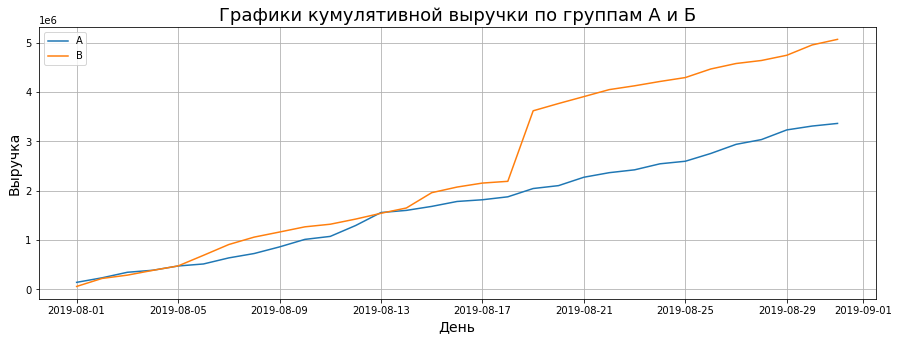

In [26]:
plt.figure(figsize=(15,5))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title('Графики кумулятивной выручки по группам А и Б', fontsize=18)
plt.xlabel('День', fontsize=14)
plt.ylabel('Выручка', fontsize=14)
plt.grid()
plt.show()

**Промежуточный вывод**

Кумулятивная выручка по группе А растет плавно с начала до последней контрольной точки проведения теста.
Кумулятивная выручка по группе В росла так же плавно с незначительным привышением значений для группы А, но 19.08.2019 произошел резкий скачок в выручке, после чего график продолжил свой рост параллельно графику группы А, но со значительно превышающими его значениями.

Данный график не может говорить о преимуществах группы В и ее большей кумулятивной выручке, поскольку вероятнее всего в указанную точку скачка на графике могут присутствовать аномально высокие значения выручки по некоторым пользователям, что может искажать реальную ситуацию.

### График кумулятивного среднего чека по группам

Постройте график кумулятивного среднего чека по группам с помощью данных, расчитанных в предыдущем пункте.

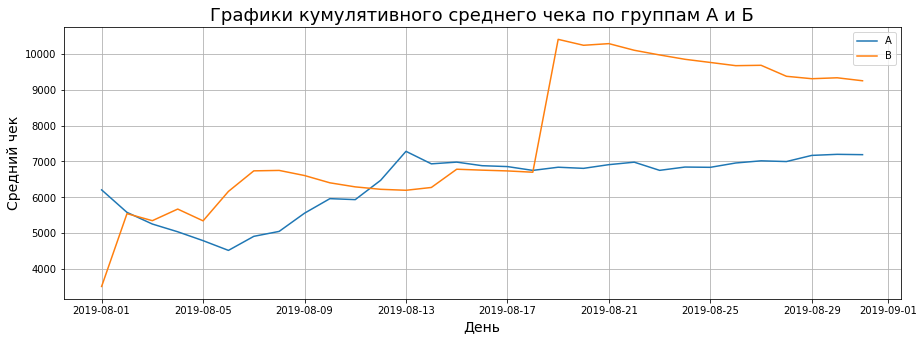

In [27]:
plt.figure(figsize=(15,5))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.legend()
plt.title('Графики кумулятивного среднего чека по группам А и Б', fontsize=18)
plt.xlabel('День', fontsize=14)
plt.ylabel('Средний чек', fontsize=14)
plt.grid()
plt.show()

**Промежуточный вывод**

Как и предполагалось в пункте ранее, 19.08.2019 произошел резкий скачок среднего чека для группы В, который вероятнее всего был вызван появлением аномально высокого чека, исказившего результаты.

До этой даты графики вели себя нестабильно, переодически средний чек был выше для группы В, переодически для группы А. После скачка среднего чека группы В, он снизился, и вышел на стабильный уровень, параллельный группе А, но превышающий ее значения на 2000 руб.

По данному графику нельзя сказать, что средний чек по группе В выше группы А, поскольку существует вероятность искажения кумулятивных значений выбросами.

### График относительного изменения кумулятивного среднего чека группы B к группе A

Для расчета данного параметра, объединим полученные ранее данные о кумулятивных выручке и количеств заказов для двух групп в одну таблицу.

In [28]:
mergedCumulativeRevenue = (cumulativeRevenueA
                          .merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
                          )
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89


На основе полученной таблицы, построим график относительного изменения кумулятивного среднего чека группы B к группе A.

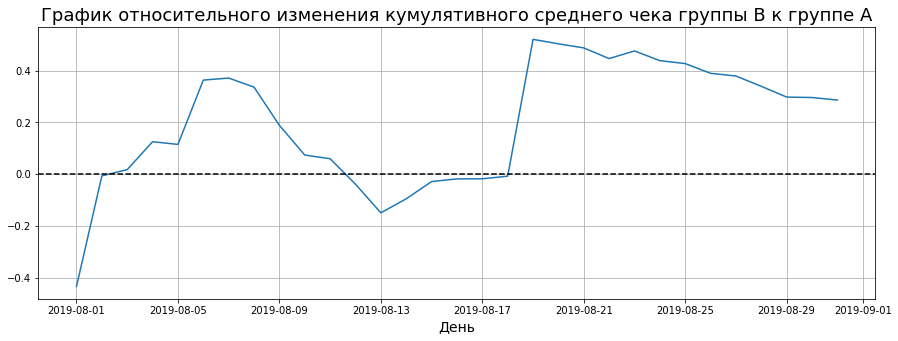

In [29]:
plt.figure(figsize=(15,5))

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=18)
plt.xlabel('День', fontsize=14)
plt.axhline(y=0, color='black', linestyle='--')
plt.grid()
plt.show()

**Промежуточный вывод**

Согласно полученному графику видно, что данные значительно менялись несколько раз в ходе проведения теста, что говорит о наличии аномальных значений в данных по результатам проведения теста. Так средний чек по группе В превышал группу А в начале эксперимента, потом начал снижаться, опустился ниже среднего чека группы А, после чего вновь начал резко подниматься.

В последние дни проведения эксперимента, график, возможно, начал стабилизироваться, но сделать вывод о более высоком чеке в группе В некорректно, поскольку в расчетных кумулятивных данных были накоплены искажения чрезмерно высокими чеками, в связи с чем итоговый результат может быть некорректен.

### График кумулятивного среднего количества заказов на посетителя по группам.

Расчитаем среднее кумулятивное количество заказов на посетителя для всего массива данных, а затем разделим его на две группы.

In [30]:
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

In [31]:
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

Построим график кумулятивного среднего количества заказов на посетителя по группам, используя полученные данные.

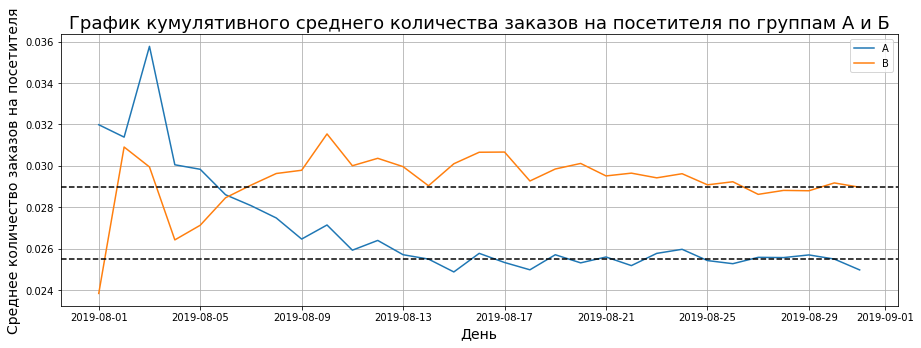

In [63]:
plt.figure(figsize=(15,5))

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.legend()
plt.axhline(y=0.029, color='black', linestyle='--')
plt.axhline(y=0.0255, color='black', linestyle='--')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам А и Б', fontsize=18)
plt.xlabel('День', fontsize=14)
plt.ylabel('Среднее количество заказов на посетителя', fontsize=14)
plt.grid()
plt.show()

**Промежуточный вывод**

В соответствии с полученным графиком можно сделать вывод, что в начале проведения теста наблюдалась нестабильность в количестве заказов на посетителей сайта, но после 9.08.2019 тенданция выровнялась для обоих групп: конверсия для группы А составляла около 2.55%, для группы В - 2.9%. Данные имеют тенденцию колебаться около этих значений.

Таким образом, посетители группы В на 0,35% чаще переходят в статус покупателей, чем в группе А. Различие не значительное, что говорит о необходимости рассмотрения и других показателей для данных групп.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

Для построения графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A, объединим кумулятивные данные о количестве заказов на посетителя из каждой группы, находящиеся в таблицах `cumulativeDataA` и `cumulativeDataB`, и построим график, используя полученный расчет.

In [33]:
mergedCumulativeConversions = (cumulativeDataA[['date', 'conversion']]
                              .merge(cumulativeDataB[['date', 'conversion']], left_on = 'date', right_on = 'date', how='left', suffixes=['A', 'B'])
                              )


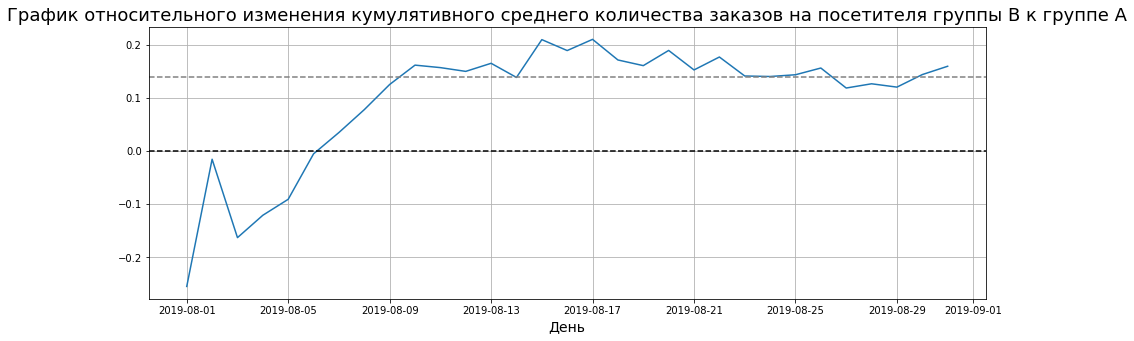

In [34]:
plt.figure(figsize=(15,5))

plt.plot(mergedCumulativeConversions['date'], (mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA'])-1)

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A', fontsize=18)
plt.xlabel('День', fontsize=14)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='gray', linestyle='--')
plt.grid()
plt.show()

**Промежуточный вывод**

Согласно полученному графику, в начале эксперимента конверсия в группе В была ниже конверсии в группе А, после чего появилась т енданция к ее увеличению. в период с 21.08.2019 и до конца эксперимента, относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A находилось на примерном уровне 14%. Следовательно группа В стабильно лидирует по данной метрике на 14%, что может говорить о более эффективном переходе посетителей в статус покупателей для данной группы.

### Точечный график количества заказов по пользователям

Для построения точечного графика количества заказов по пользователям, создадим сводную таблицу, содержащую данные о посетителях и количестве всех их уникальных заказов. На основе полученных данных построим требуемый график.

In [35]:
orders_number = (orders
                 .pivot_table(index='visitorId', values='transactionId', aggfunc='nunique')
                 .sort_values(by='transactionId', ascending=False)
                 .reset_index()
                )
orders_number.head()

,visitorId,transactionId
0,3967698036,3
1,249864742,3
2,2108163459,3
3,2988190573,3
4,3908431265,3


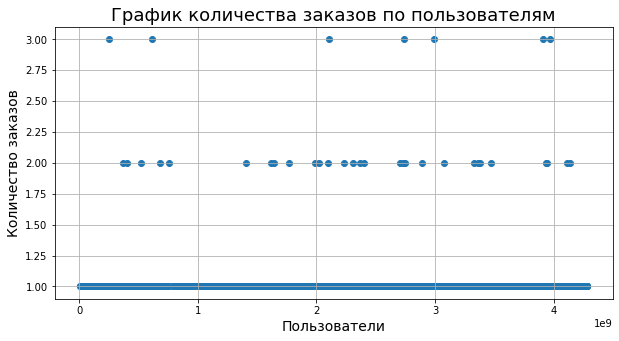

In [36]:
plt.figure(figsize=(10,5))

plt.scatter(orders_number['visitorId'], orders_number['transactionId'])

plt.title('График количества заказов по пользователям', fontsize=18)
plt.xlabel('Пользователи', fontsize=14)
plt.ylabel('Количество заказов', fontsize=14)
plt.grid()
plt.show()

**Промежуточный вывод**

Согласно полученному графику, наибольшая часть пользователей оформляет только один заказ на сайте. Оформление двух заказов происходит значительно реже. Необходимо отметить, что оформления трех заказов единичны, что скорее говорит о нестандартном поведении таких пользователей и является выбросами для данного теста.

Для более точного определения категории выбросов, определим пограничное значения в качестве 95-й и 99-й перцентилей, после чего определим, какую часть данных можно считать аномалиями.  

### 95-й и 99-й перцентили количества заказов на пользователя.

Рассчитаем 95-й и 99-й перцентили количества заказов на пользователя, после чего выберем границу для определения аномальных пользователей.

In [37]:
np.percentile(orders_number['transactionId'], [90, 95, 99])

array([1., 1., 2.])

In [38]:
number_percent = np.percentile(orders_number['transactionId'], 99)

**Промежуточный вывод**

Как видно из полученного расчета, пользователи, оформившие 2 заказа и более составляют 1% от выборки, что подтверждается полученными выше графиками.

Отсеивание от 1 до 5% наблюдений с крайними значениями считается нормальным при проведении анализа. Примем границей для определения аномальных пользователей 99й персентиль, т.е. отсеим 1% данных, являющихся близкими к аномальным.

### Точечный график стоимостей заказов.

Построим точечный график стоимостей заказов на основе имеющихся данных в таблице `orders`.

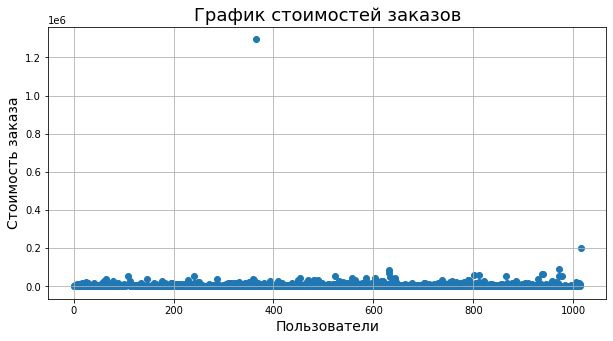

In [39]:
plt.figure(figsize=(10,5))

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

plt.title('График стоимостей заказов', fontsize=18)
plt.xlabel('Пользователи', fontsize=14)
plt.ylabel('Стоимость заказа', fontsize=14)
plt.grid()
plt.show()

Из данного графика видно, что в массиве данных имеется два заказа, являющихся аномальными, один из них составил более 1,2млн, что может быть так же ошибкой в данных. Наличие такие заказов может являться основной причиной скачков на графиках, обнаруженных в начале исследования для группы В.

Для нагладности построим график в большем масштабе, не учитывая выявленные аномалии.

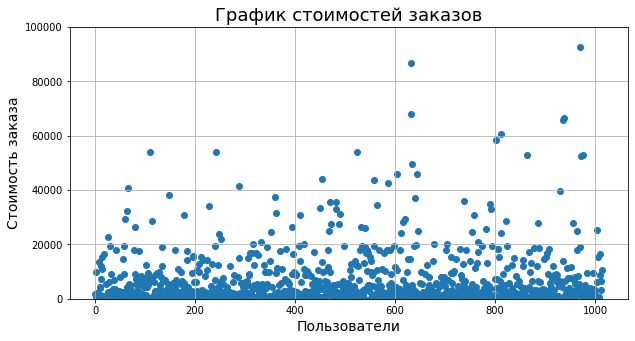

In [40]:
plt.figure(figsize=(10,5))

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

plt.ylim(0, 0.1*10**6)
plt.title('График стоимостей заказов', fontsize=18)
plt.xlabel('Пользователи', fontsize=14)
plt.ylabel('Стоимость заказа', fontsize=14)
plt.grid()
plt.show()

**Промежуточный вывод**

Из полученного графика видно, что основное количество заказов имело стоимость в пределах 10 000, при увеличении стоимости заказов их количество уменьшаются, заказы на сумму выше 20 000 являются редкими.  

Для более точного определения категории выбросов, определим пограничное значения в качестве 95-й и 99-й перцентилей.

### 95-й и 99-й перцентили стоимости заказов.

Рассчитаем 95-й и 99-й перцентили стоимости заказов, после чего выберем границу для определения аномальных пользователей. 

In [41]:
np.percentile(orders['revenue'], [90, 95, 99])

array([17990., 26785., 53904.])

In [42]:
revenue_percent = np.percentile(orders['revenue'], 95)

**Промежуточный вывод**

Как видно из полученного расчета, только 5% пользователей оформляет заказы на сумму выше 28 000, а 1% пользователей - на сумму выше 58 233, что подтверждается полученными выше графиками.

В соответствии с графиком выше, количество заказов на сумму более 20 000 значительно сокращается относительно заказов меньшей стоимости. Учитывая что отсеивание до 5% наблюдений с крайними значениями считается нормальным при проведении анализа, примем границей для определения аномальных пользователей 95й персентиль, т.е. отсеим 5% данных, являющихся близкими к аномальным.

### Рассчет статистической значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Рассчитаем ежедневное количество пользователей для групп А и В.

In [43]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]

visitorsADaily.columns = ['date', 'visitorsPerDateA']

In [44]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]

visitorsBDaily.columns = ['date', 'visitorsPerDateB']

Создадим таблицу с количеством заказов для каждого пользователя отдельно для каждой группы.

In [45]:
ordersByUsersA =(
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId':pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

In [46]:
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId':pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']


In [47]:
sampleA = (pd.concat([ordersByUsersA['orders'],
                      pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                                name='orders')],axis=0)
          )

In [48]:
sampleB = (pd.concat([ordersByUsersB['orders'],
                      pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                                name='orders')],axis=0)
          )

Обозначим нулевую и альтернативную гипотезу для проведения теста:

**Нулевая гипотеза** - Среднее количество заказов между группами в сырых данных одинаковое.

**Альтернативная гипотеза** - Среднее количество заказов между группами в сырых данных разное.

Рассчитаем статистическую значимость p-value различия среднего количества заказов по результатам теста с применением теста Манна-Уитни. Формат данного теста наиболее удобен при работе с данными, которые имеют выбросы, поскольку это непараметрический метод и сравнение групп будет происходить по номеру ранга для одних и тех же значений, присвоенному при ранжировании от меньшего к большему для каждой группы, а не по фактической величине значения. Таким образом выбросы не могут оказывать значительного влияния на результат.

In [49]:
"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1])

'0.011'

Рассчитаем относительное различие в среднем между группами

In [50]:
"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1)

'0.160'

**Промежуточный вывод**

Расчет статистической значимости различия среднего количества заказов показал, что расчитанный p-value значительно ниже 0.05 (стандартное значение статистической значимости), а значит Нулевая липотеза должна быть отвергнута. Принимаем Альтернативную гипотезу, говорящую о том, что в среднем количестве заказов между группами есть статистически значимые различия.

Расчет относительного различия в среднем между группами показал, что относительный прирост группы В составляем 16%

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

Обозначим нулевую и альтернативную гипотезу для проведения теста:

**Нулевая гипотеза** - Средний чек заказа в группе А и В в сырых данных одинаковый.

**Альтернативная гипотеза** - Средний чек заказа в группе А и В в сырых данных разный.

Рассчитаем статистическую значимость p-value различия в среднем чеке заказа по результатам теста так же с применением теста Манна-Уитни.

In [51]:
('{0:.3f}'
 .format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                            orders[orders['group']=='B']['revenue'])[1])
)

'0.829'

Рассчитаем относительный прирост среднего чека группы В.

In [52]:
('{0:.3f}'
 .format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)
)

'0.287'

**Промежуточный вывод**

Расчет статистической значимости различия в среднем чеке заказа показал, что расчитанный p-value значительно больше 0.05 (стандартное значение статистической значимости), а значит между группами нет статистически значимых различий по данному показателю. Оставляем Нулевую гипотезу.

Расчет относительного прироста среднего чека группы В составляет 28,7% относительно группы А, что скорее всего было обусловлено наличием значительных аномалий в данных.

### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Рассчитаем те же показатели для "очещенных" данных. В соответствии с принятым ранее решением, будем считать чистыми данные, входящие в 99-й персентиль по количеству заказов и в 95-й персентиль по их сумме, т.е. по пользователям, оформившим 1 или 2 заказа на сумму меньше 28000.

Выделим аномальные данные в отдельные таблицы.

In [53]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > number_percent]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > number_percent]['userId'],
    ],
    axis=0,
)

In [54]:
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_percent]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

Отфильтруем данные с учетом аномалий.

In [55]:
sampleAFiltered = (pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
     pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
               name='orders',),
    ],
    axis=0,)
                  )

In [56]:
sampleBFiltered = (pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
     pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
               name='orders',),
    ],
    axis=0,) 
                  )

Обозначим нулевую и альтернативную гипотезу для проведения теста:

**Нулевая гипотеза** - Среднее количество заказов между группами в очищенных данных одинаковое.

**Альтернативная гипотеза** - Среднее количество заказов между группами в очищенных данных  разное.

Рассчитаем статистическую значимость p-value различия среднего количества заказов по результатам теста с применением теста Манна-Уитни для очищенных данных.

In [57]:
'{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])

'0.012'

Рассчитаем относительное различие в среднем между группами для очищенных данных.

In [58]:
'{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)

'0.182'

**Промежуточный вывод**

Удаление аномальных данных из массива не привело к значительным изменениям данных показателей.

Расчет статистической значимости различия среднего количества заказов для очищенных данных также показал, что расчитанный p-value значительно ниже 0.05 (стандартное значение статистической значимости), а значит Нулевая гипотеза должна быть отвергнута. Принимаем Альтернативную гипотезу, что в среднем количестве заказов между группами есть статистически значимые различия.

Расчет относительного различия в среднем между группами увеличился и показал, что относительный прирост группы В составляет 18,2%

### Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Обозначим нулевую и альтернативную гипотезу для проведения теста:

**Нулевая гипотеза** - Средний чек заказа в группе А и В в очищенных данных одинаковый.

**Альтернативная гипотеза** - Средний чек заказа в группе А и В в очищенных данных разный.

Рассчитаем статистическую значимость p-value различия в среднем чеке заказа по результатам теста по «очищенным» данным с применением теста Манна-Уитни. 

In [59]:
('{0:.3f}'.format(stats.mannwhitneyu
                  (orders[np.logical_and(orders['group'] == 'A',
                                         np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],
                   orders[np.logical_and(orders['group'] == 'B',
                                         np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],)[1])
)

'0.646'

In [60]:
("{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B',
                                        np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()
                  / orders[np.logical_and(orders['group'] == 'A',
                                          np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()- 1)
)

'-0.048'

**Промежуточный вывод**

Расчет статистической значимости различия в среднем чеке практически не изменился с расчетом для неочищенных данных, расчитанный p-value также значительно больше 0.05 (стандартное значение статистической значимости), а значит Нулевая гипотеза не может быть отвергнута, между группами нет статистически значимых различий по данному показателю.

Расчет относительного прироста среднего чека группы В изменился кардинально и показал, что группа В отстает от группы А на 4.8%, следовательно имеющиеся в данных аномалии оказывали значительное влияние на расчет среднего чека.

### Принатие решения по результатам теста.

В ходе проведения анализа, было выявлено, что группа В лидирует по некоторым показателям, таким как конверсия, что в свою очередь привело к тому, что различия в группах по количеству заказов превышает статистически значимый уровень, а значит должно быть принято во внимание. Данный факт говорит о том, что при применении условий для группы В, несмотря на то, что средние чеки в группах не различаются, может быть эффективным шагом для улучшения экономического состояния.

В связи с этим, может быть принято решение об остановке теста и признания группы В лидером.

## Вывод по проекту.

В ходе проведения данного исследования были проведены:
1.	Приоритизация списка гипотез, подготовленного отделом маркетинга, с целью увеличения выручки интернет-магазина двумя методами. В ходе данного процесса были определены наиболее приоритетные гипотезы и описаны различи мажду расчетами с помощью двух показателей и выдвинуты соответствующие рекомендации.
2.	Анализ А/В-теста путем расчета ряда характеристик, по итогам данного теста было выявлено:

- Анализ кумулятивной выручки и среднего чека по группам показал наличие аномально высоких данных в группе В, искажающих ситуацию, в связи с чем группа В в большинстве случаев находилась в лидерах анализа.
- Расчет конверсии для группы А составлял около 2.55%, для группы В - 2.9%, т.е. посетители группы В на 0,35% чаще переходят в статус покупателей, чем в группе А. В то же время относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A находилось составляет 11%, что говорит о о более эффективном переходе посетителей в статус покупателей для данной группы.
- Было определено, что наибольшая часть пользователей оформляет только один заказ на сайте. Оформление двух заказов происходит значительно реже, пользователи, оформившие 2 заказа и более составляют 5% от выборки.
- Было определено, что основное количество заказов имело стоимость в пределах 10 000, при увеличении стоимости заказов их количество уменьшаются, заказы на сумму выше 20 000 являются редкими, только 5% пользователей оформляет заказы на сумму выше 28 000.
- Расчет статистической значимости различия среднего количества заказов по неочищенным данным показал, что в среднем количестве заказов между группами есть статистически значимые различия, относительный прирост группы В составляет 13,8%. Очистка данных не изменила результата.
- Расчет статистической значимости различия в среднем чеке заказа как для очищенных так и для не очищенных данных показал, что между группами нет статистически значимых различий по данному показателю. Для очищенных данных расчет относительного прироста среднего чека группы В показал, что группа В отстает от группы А на 2%, следовательно значимого различия среднего чека нет.

Таким образом, в ходе проведения анализа, было выявлено, что группа В лидирует по некоторым показателям, таким как конверсия. Данный факт говорит о том, что при применении условий для группы В может быть эффективным шагом для улучшения экономического состояния. В связи с этим, рекомендуется принятие решения об остановке теста и признании группы В лидером.